In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('cluster_example_data.csv')
data = data.values

In [3]:
X = data[:,:-1]
ids = data[:,-1]

In [4]:
X

array([[34,  5],
       [25,  5],
       [30,  2],
       [38, 20],
       [44, 12],
       [48, 18],
       [52, 22],
       [60, 19],
       [34, 18],
       [34, 22],
       [25, 18],
       [25, 15],
       [24, 10],
       [30,  3],
       [40,  3],
       [44,  2],
       [48,  4],
       [52,  4],
       [60,  2],
       [25,  3],
       [52,  4],
       [34, 15],
       [48,  5],
       [44,  8],
       [52,  2],
       [52, 10]], dtype=int64)

In [12]:
import matplotlib.pyplot as plt

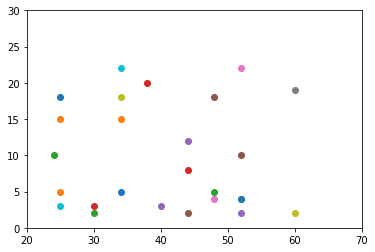

In [13]:
for V in X:
    plt.scatter(V[0],V[1])
plt.ylim(0, 30) # 경계 지정하기
plt.xlim(20, 70)
plt.show()

In [5]:
from sklearn.cluster import DBSCAN

In [34]:
clustering = DBSCAN(eps=3.5, min_samples=2).fit(X)

In [35]:
clustering.labels_

array([-1,  0,  1, -1, -1, -1, -1, -1,  2, -1,  3,  3, -1,  1, -1, -1,  4,
        5, -1,  0,  5,  2,  4, -1,  5, -1], dtype=int64)

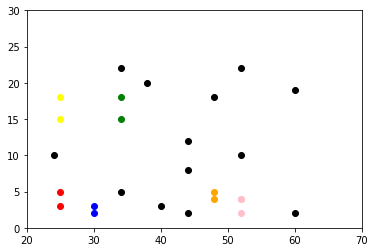

In [36]:
cluster_nums = []
for doc_num, cluster_num in enumerate(clustering.labels_): 
    cluster_nums.append(cluster_num)
#     print(ids[doc_num], cluster_num)
for k in range(len(ids)):
    if cluster_nums[k] == 0:
        plt.scatter(X[k][0],X[k][1], c='red')
    elif cluster_nums[k] == 1:
        plt.scatter(X[k][0],X[k][1], c='blue')
    elif cluster_nums[k] == 2:
        plt.scatter(X[k][0],X[k][1], c='green')
    elif cluster_nums[k] == 3:
        plt.scatter(X[k][0],X[k][1], c='yellow')
    elif cluster_nums[k] == 4: 
        plt.scatter(X[k][0],X[k][1], c='orange')
    elif cluster_nums[k] == 5: 
        plt.scatter(X[k][0],X[k][1], c='pink')
    else:
        plt.scatter(X[k][0],X[k][1], c='black')
plt.ylim(0, 30) # 경계 지정하기
plt.xlim(20, 70)
plt.show()

In [22]:
# get distance with nearest neighbor
def nearest_dist(a):
    norms = []
    for i in range(len(a)):
        temp_norms = []
        for j in range(len(a)):
            if i != j:
                norm = np.linalg.norm(a[i]-a[j])
                temp_norms.append(norm)
        norms.append(min(temp_norms))
    return norms

In [23]:
find_epsilon = nearest_dist(X)

In [24]:
np.array(find_epsilon).mean()

3.467200573812675

In [38]:
clustering1 = DBSCAN(eps=3.5, min_samples=2).fit(X)

In [39]:
clustering1.labels_

array([-1,  0,  1, -1, -1, -1, -1, -1,  2, -1,  3,  3, -1,  1, -1, -1,  4,
        5, -1,  0,  5,  2,  4, -1,  5, -1], dtype=int64)

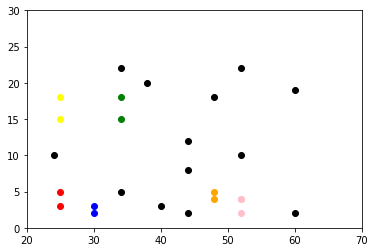

In [40]:
cluster_nums = []
for doc_num, cluster_num in enumerate(clustering1.labels_): 
    cluster_nums.append(cluster_num)
#     print(ids[doc_num], cluster_num)
for k in range(len(ids)):
    if cluster_nums[k] == 0:
        plt.scatter(X[k][0],X[k][1], c='red')
    elif cluster_nums[k] == 1:
        plt.scatter(X[k][0],X[k][1], c='blue')
    elif cluster_nums[k] == 2:
        plt.scatter(X[k][0],X[k][1], c='green')
    elif cluster_nums[k] == 3:
        plt.scatter(X[k][0],X[k][1], c='yellow')
    elif cluster_nums[k] == 4: 
        plt.scatter(X[k][0],X[k][1], c='orange')
    elif cluster_nums[k] == 5: 
        plt.scatter(X[k][0],X[k][1], c='pink')
    else:
        plt.scatter(X[k][0],X[k][1], c='black')
plt.ylim(0, 30) # 경계 지정하기
plt.xlim(20, 70)
plt.show()

# Cosine 사용하기

In [45]:
clustering1 = DBSCAN(eps=0.001, min_samples=2, metric='cosine').fit(X)
# epsilon 의 값을 기준으로 연결이 된다는 것을 기억
# cosine distance = 1 - cosine similarity

In [46]:
clustering1.labels_

array([ 0,  0,  0,  1,  2,  3,  3,  2,  1,  4, -1,  4,  3,  0,  0,  0,  0,
        0,  0,  0,  0,  3,  0,  0,  0,  0], dtype=int64)

In [47]:
cluster_nums = []
for doc_num, cluster_num in enumerate(clustering1.labels_): 
    cluster_nums.append(cluster_num)
#     print(ids[doc_num], cluster_num)

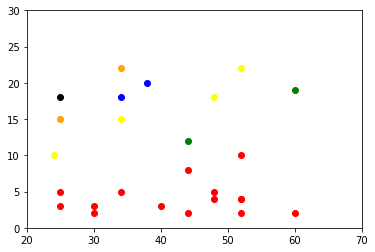

In [48]:
for k in range(len(ids)):
    if cluster_nums[k] == 0:
        plt.scatter(X[k][0],X[k][1], c='red')
    elif cluster_nums[k] == 1:
        plt.scatter(X[k][0],X[k][1], c='blue')
    elif cluster_nums[k] == 2:
        plt.scatter(X[k][0],X[k][1], c='green')
    elif cluster_nums[k] == 3:
        plt.scatter(X[k][0],X[k][1], c='yellow')
    elif cluster_nums[k] == 4: 
        plt.scatter(X[k][0],X[k][1], c='orange')
    elif cluster_nums[k] == 5: 
        plt.scatter(X[k][0],X[k][1], c='pink')
    else:
        plt.scatter(X[k][0],X[k][1], c='black')
plt.ylim(0, 30) # 경계 지정하기
plt.xlim(20, 70)
plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
X1 = StandardScaler().fit_transform(X)

In [20]:
clustering2 = DBSCAN(eps=0.1, min_samples=2, metric='cosine').fit(X1)

In [21]:
clustering2.labels_

array([ 0,  0,  0,  1,  2,  2,  2,  2,  1,  1,  1,  1, -1,  0,  3,  3,  3,
        3,  3,  0,  3,  1,  3,  3,  3, -1], dtype=int64)

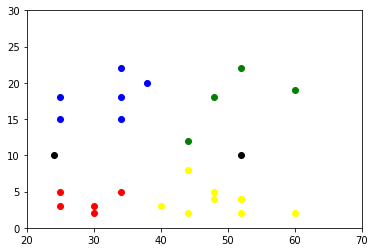

In [22]:
cluster_nums = []
for doc_num, cluster_num in enumerate(clustering2.labels_): 
    cluster_nums.append(cluster_num)
for k in range(len(ids)):
    if cluster_nums[k] == 0:
        plt.scatter(X[k][0],X[k][1], c='red')
    elif cluster_nums[k] == 1:
        plt.scatter(X[k][0],X[k][1], c='blue')
    elif cluster_nums[k] == 2:
        plt.scatter(X[k][0],X[k][1], c='green')
    elif cluster_nums[k] == 3:
        plt.scatter(X[k][0],X[k][1], c='yellow')
    elif cluster_nums[k] == 4: 
        plt.scatter(X[k][0],X[k][1], c='orange')
    elif cluster_nums[k] == 5: 
        plt.scatter(X[k][0],X[k][1], c='pink')
    else:
        plt.scatter(X[k][0],X[k][1], c='black')
plt.ylim(0, 30) # 경계 지정하기
plt.xlim(20, 70)
plt.show()